In [2]:
%matplotlib notebook
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.morphology import thin, skeletonize
from skimage.draw import circle
from skimage.filters import gaussian
from scipy.misc import imsave

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

def create_filter(fft, xfwidth, yfwidth, radius_of_filter, blur):
    y_size, x_size=fft.shape
    x1=round(x_size/2)-round(x_size/xfwidth)
    x2=round(x_size/2)+round(x_size/xfwidth)
    y1=round(y_size/2)+round(y_size/yfwidth)
    y2=round(y_size/2)-round(y_size/yfwidth)

    fft_filter=np.zeros_like(np.abs(fftim))

    # two circle filter
    rr, cc = circle(r=y1, c=x1, radius=radius_of_filter, shape=fft_filter.shape)
    fft_filter[rr, cc] = 1
    rr, cc = circle(r=y2, c=x2, radius=radius_of_filter, shape=fft_filter.shape)
    fft_filter[rr, cc] = 1
    
    fft_filter=gaussian(fft_filter, blur)

    return (x1,x2,y1,y2), fft_filter

def plot_filter(fft, xfwidth, yfwidth, radius_of_filter, blur):
    (x1,x2,y1,y2), fft_filter=create_filter(fft, xfwidth, yfwidth, radius_of_filter, blur)
    
    x_l=x1-radius_of_filter
    x_u=x2+radius_of_filter
    y_l=y2-radius_of_filter
    y_u=y1+radius_of_filter
    
    masked_fft=fft_filter*fftim
   
    fig, ax=plt.subplots(figsize=(8,8))
    ax.imshow(np.abs(masked_fft[y_l:y_u,x_l:x_u]))

def plot_threshold(im, threshold):
    bwimage=im>threshold
    imthin=thin(bwimage)

    fig, ax=plt.subplots(figsize=(12,8))
    ax.imshow(imthin, cmap='gray')
    
x_fringe_width=widgets.IntSlider(min=0,
                                 max=200,
                                 step=5,
                                 value=100,
                                 description='Fringe width in x:', 
                                 continuous_update=False)

y_fringe_width=widgets.IntSlider(min=0,
                                 max=200,
                                 step=5,
                                 value=100,
                                 description='Fringe width in y:', 
                                 continuous_update=False)

radius_of_filter=widgets.IntSlider(min=0,
                                   max=200,
                                   step=5,
                                   value=40,
                                   description='Radius of filter:', 
                                   continuous_update=False)

blur=widgets.IntSlider(min=0,
                       max=50,
                       step=1,
                       value=10,
                       description='Filter blur:', 
                       continuous_update=False)

threshold=widgets.FloatSlider(min=0,
                              max=0.1,
                              step=0.0001,
                              value=0.03,
                              description='Binary threshold:',
                              continuous_update=False,
                              readout=True,
                              readout_format='.3f',
                             )

In [48]:
%cd "C:\Users\jdhare\Google Drive\MAGPIE\data\2017\s0510_17 C asymmetric double exploder"

interferogram_path="s0510_17 532nm end on interferometry (3).JPG"

interferogram=imread(interferogram_path)
interferogram=rgb2gray(interferogram)#to convert the image into a logical array.
fftim=(np.fft.fftshift(np.fft.fft2(interferogram)))

C:\Users\jdhare\Google Drive\MAGPIE\data\2017\s0510_17 C asymmetric double exploder


<IPython.core.display.Javascript object>


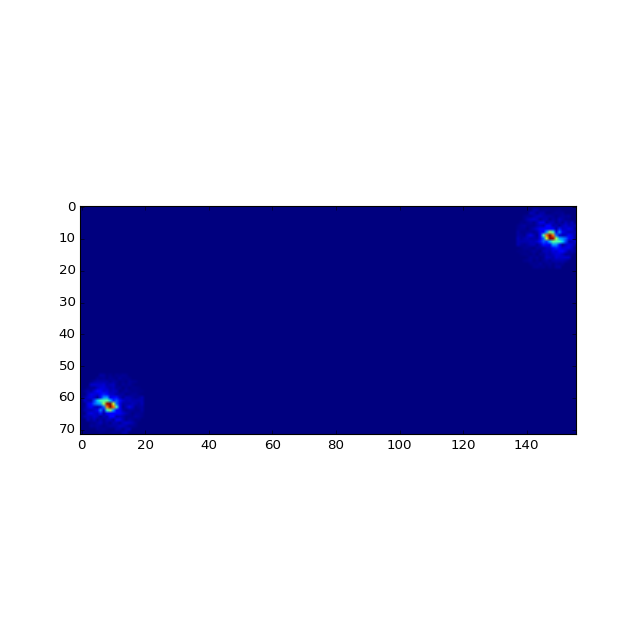

In [49]:
w1=interactive(plot_filter, 
               fft=fixed(fftim), xfwidth=x_fringe_width, yfwidth=y_fringe_width, 
               radius_of_filter=radius_of_filter, blur=blur)
display(w1)

<IPython.core.display.Javascript object>


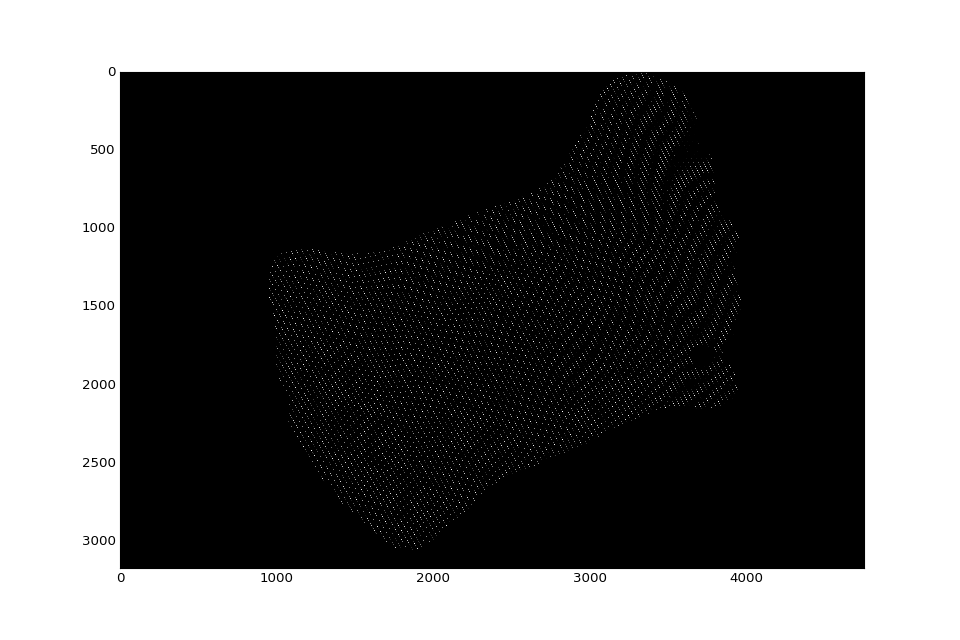

In [51]:
a,fft_filter=create_filter(**w1.kwargs)
masked_fft=fft_filter*fftim
ifftim=abs((np.fft.ifft2(masked_fft)))

w2=interactive(plot_threshold, im=fixed(ifftim), threshold=threshold)
display(w2)

In [11]:
bwimage=ifftim>w2.kwargs['threshold']
imthin=thin(bwimage)
invert=1-imthin
save_fn=os.path.splitext(interferogram_path)[0]+' traced.png'
imsave(save_fn, invert)

# Annular filter

<IPython.core.display.Javascript object>


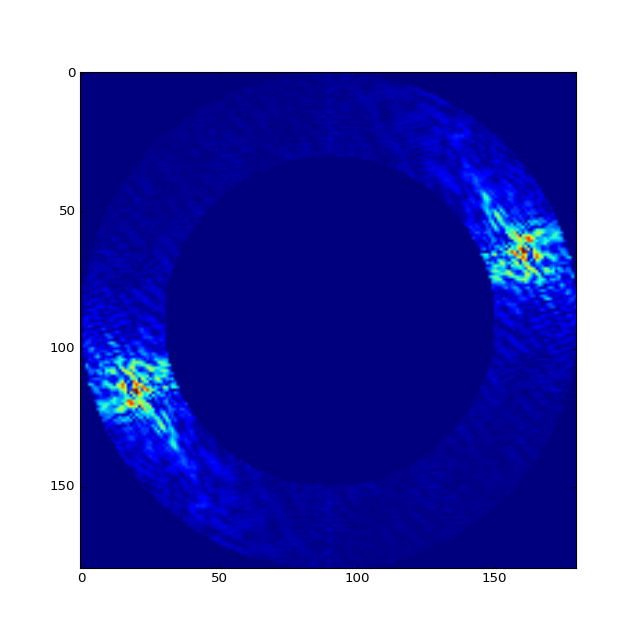

In [39]:
fft_filter=np.zeros_like(np.abs(fftim))
ysize,xsize=fft_filter.shape
r0=ysize//2
c0=xsize//2

r1=60
r2=90

# annular
rr, cc = circle(r=r0, c=c0, radius=r2, shape=fft_filter.shape)
fft_filter[rr, cc] = 1
rr, cc = circle(r=r0, c=c0, radius=r1, shape=fft_filter.shape)
fft_filter[rr, cc] = 0

masked_fft=fft_filter*fftim

x_l=c0-r2
x_u=c0+r2
y_l=r0-r2
y_u=r0+r2

fig, ax=plt.subplots(figsize=(8,8))
ax.imshow(np.abs(masked_fft[y_l:y_u,x_l:x_u]))

In [44]:
ifftim=abs((np.fft.ifft2(masked_fft)))
threshold=0.15
bwimage=interferogram>threshold

In [46]:
tt=thin(bwimage, max_iter=1000)

<IPython.core.display.Javascript object>


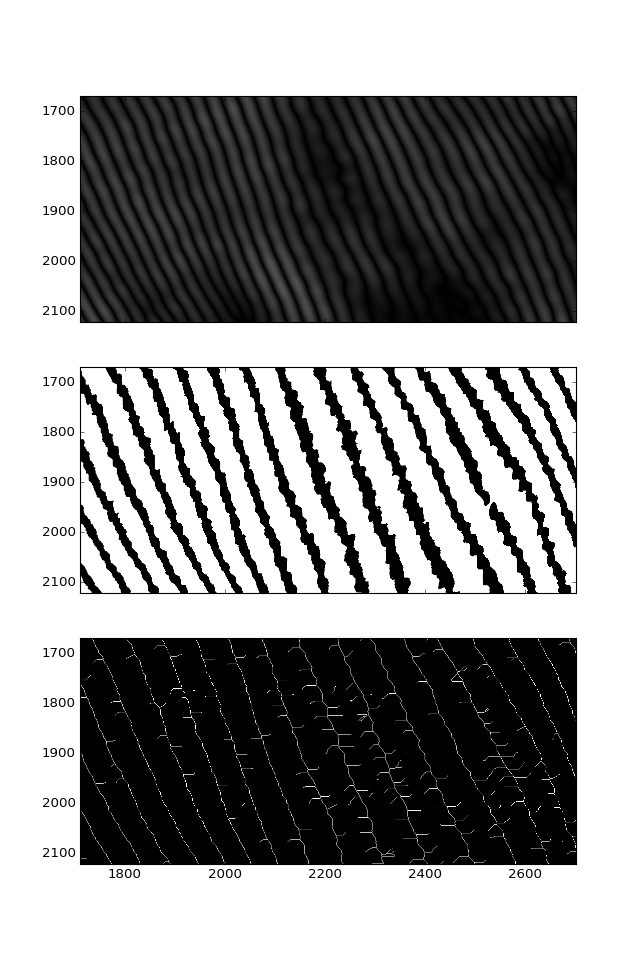

In [47]:
fig, ax=plt.subplots(3,1, figsize=(8,12), sharex=True, sharey=True)
ax[0].imshow(ifftim, cmap='gray', clim=[0,1])
ax[1].imshow(bwimage, cmap='gray', clim=[0,1])
ax[2].imshow(tt, cmap='gray', clim=[0,1])

# No Filter (just normalisation)

In [4]:
interferogram=rgb2gray(interferogram)#to convert the image into a logical array.
blurred_interferogram=gaussian(interferogram, 40)
normalised_interferogram=interferogram/blurred_interferogram

<IPython.core.display.Javascript object>


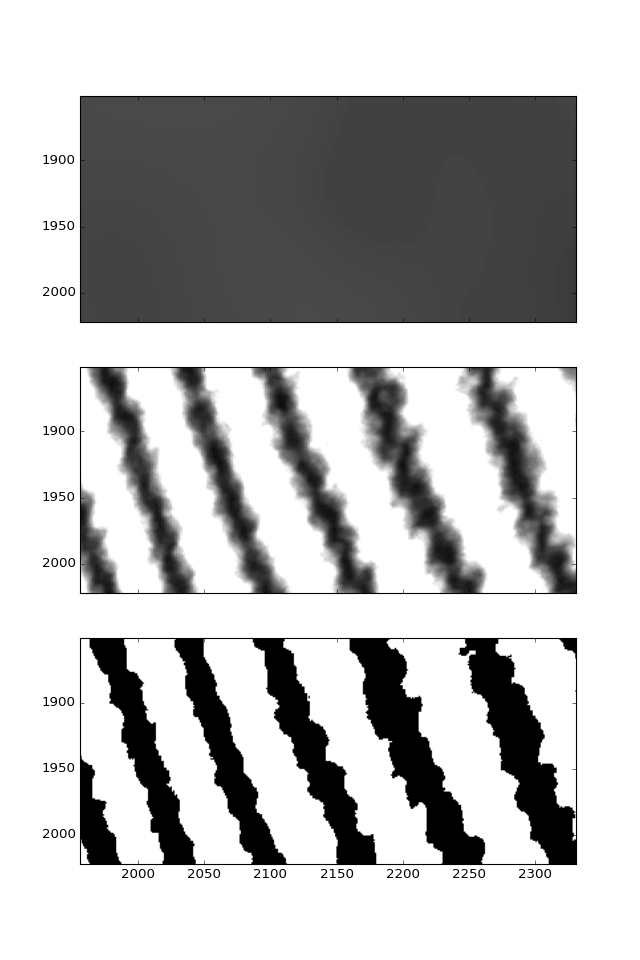

In [8]:
threshold=0.2
bwimage=interferogram>threshold

fig, ax=plt.subplots(3,1, figsize=(8,12), sharex=True, sharey=True)
ax[0].imshow(blurred_interferogram, cmap='gray', clim=[0,1])
ax[1].imshow(normalised_interferogram, cmap='gray', clim=[0,1])
ax[2].imshow(bwimage, cmap='gray', clim=[0,1])

In [17]:
tt=thin(bwimage, max_iter=1000)

<IPython.core.display.Javascript object>


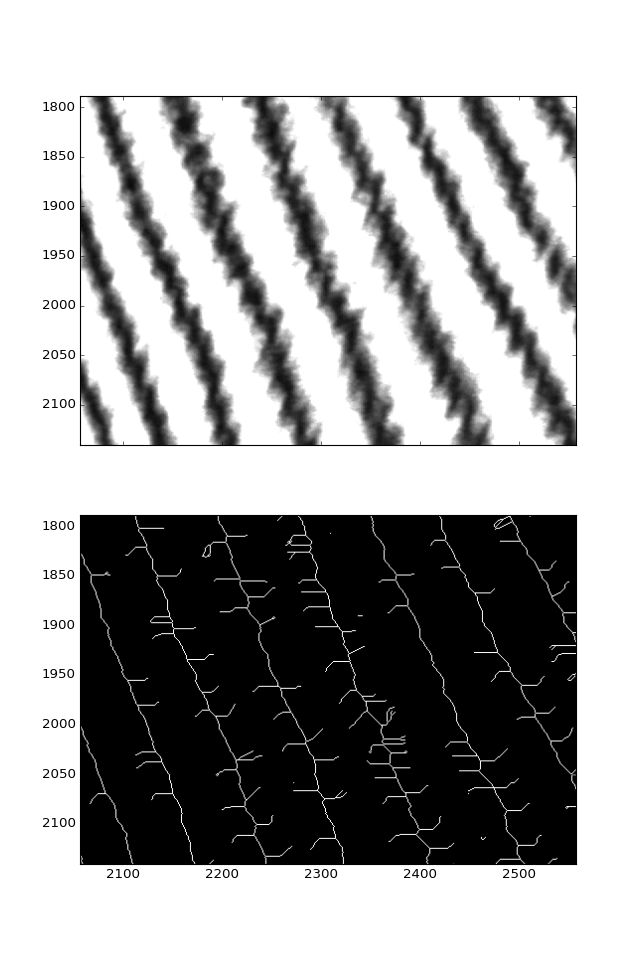

In [18]:
fig, ax=plt.subplots(2,1, figsize=(8,12), sharex=True, sharey=True)
ax[0].imshow(normalised_interferogram, cmap='gray', clim=[0,1])
ax[1].imshow(tt, cmap='gray', clim=[0,1])